**Project Description**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

The objective of this project is to analyze a dataset containing 12 features related to heart failure and develop a robust machine learning model to predict mortality risk. Through data exploration and preprocessing, the project aims to uncover significant patterns and insights that can enhance predictive accuracy.

In [1]:
# Importing necessary libraries for data processing and machine learning
import numpy as np # For linear algebra operations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Plotting graphs

# Scikit-learn is a widely-used Python library for machine learning that facilitates the training of various algorithms. 
# It provides functionalities for dataset splitting, hyperparameter tuning, and a comprehensive set of pre-defined evaluation metrics, 
# making it easier to build, validate, and optimize machine learning models efficiently.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    matthews_corrcoef,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import boxcox # Box-Cox Transformation

import shap # For SHAP values visualization


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


**Read Dataset**

Heart Failure Clinical Records: This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

In [3]:
# Read csv file as a pandas dataframe for easier manipulation
df = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**Dataset Description**

The dataset consists of 299 entries, ranging from index 0 to 298.
There are 13 features, which report clinical, body and lifestyle information that we briefly describe here. 

1. Age: age of the patient (years)
2. Anaemia: decrease of red blood cells or hemoglobin (1= true, 0 = false)
3. Creatinine phosphokinase  (CPK): level of the CPK enzyme in the blood (mcg/L). When a muscle tissue gets damaged, CPK flows into the blood. Therefore, high levels of CPK in the blood of a patient might indicate a heart failure or injury
4. Diabetes: if the patient has diabetes (1= true, 0 = false)
5. Ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
6. High blood pressure: if the patient has hypertension (1= true, 0 = false)
7. Platelets: platelets in the blood (kiloplatelets/mL)
8. Sex: woman or man (0 = woman, 1 = man)
9. Serum creatinine: level of serum creatinine in the blood (mg/dL)
10. Serum sodium: level of serum sodium in the blood (mEq/L). An abnormally low level of sodium in the blood might be caused by heart failure.
11. Smoking: if the patient smokes or not (1= true, 0 = false)
12. Time: follow-up period (days)
13. [target] Death event: if the patient died during the follow-up period (1= true, 0 = false)

In [4]:
# Display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


As we can see in the dataset information, we have 6 categorical and 7 numerical variables. The Non-Null Count column indicates that there are no missing values in any column.

In [5]:
# Count the number of patients that died during the follow-up period
df_patients_died = df[df['DEATH_EVENT']==1]
print("Number of patients that died during follow-up period:", df_patients_died['DEATH_EVENT'].count())

df_patients_survived = df[df['DEATH_EVENT']==0]
print("Number of patients that survived during follow-up period:", df_patients_survived['DEATH_EVENT'].count())

Number of patients that died during follow-up period: 96
Number of patients that survived during follow-up period: 203


Our dataset reveals a significant class imbalance, comprising 203 patients who survived heart failure and 96 who did not during the follow-up period. Statistically, this translates to approximately 32.11% of patients who died (positives) and 67.89% who survived (negatives).

**Statistical Analysis**

In our statistical analysis, we will conduct both univariate and bivariate analyses. The univariate analysis examines each feature individually, while the bivariate analysis explores the relationship between features and the target variable.
* **Univariate Analysis:** For numerical features, we will assess the distribution of each variable by calculating statistical measures and plotting histograms to visualize their distributions. For categorical features, we will use bar plots for representation.

* **Bivariate analysis:** For numerical features, we will compute statistics for deceased and surviving patients, represented through KDE plots to illustrate variations between the outcomes. For categorical features, stacked bar plots will help visualize their influence on survival.

In [6]:
# Define numerical features
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Calculate descriptive statistics for the entire dataset
full_stats = df[numerical_features].describe().T
full_stats = full_stats[['mean', 'std', 'min', 'max']]
full_stats['Group'] = 'Full Dataset'

# Calculate descriptive statistics for dead patients
dead_stats = df_patients_died[numerical_features].describe().T
dead_stats = dead_stats[['mean', 'std', 'min', 'max']]
dead_stats['Group'] = 'Dead Patients'

# Calculate descriptive statistics for survived patients
survived_stats = df_patients_survived[numerical_features].describe().T
survived_stats = survived_stats[['mean', 'std', 'min', 'max']]
survived_stats['Group'] = 'Survived Patients'

# Combine all DataFrames into one
combined_stats = pd.concat([full_stats, dead_stats, survived_stats], axis=0)

# Move 'Group' column to the front (optional)
combined_stats.reset_index().set_index(['Group', 'index'])

mean           std  \
Group             index                                                   
Full Dataset      age                           60.833893     11.894809   
                  creatinine_phosphokinase     581.839465    970.287881   
                  ejection_fraction             38.083612     11.834841   
                  platelets                 263358.029264  97804.236869   
                  serum_creatinine               1.393880      1.034510   
                  serum_sodium                 136.625418      4.412477   
                  time                         130.260870     77.614208   
Dead Patients     age                           65.215281     13.214556   
                  creatinine_phosphokinase     670.197917   1316.580640   
                  ejection_fraction             33.468750     12.525303   
                  platelets                 256381.044792  98525.682856   
                  serum_creatinine               1.835833      1.468562   
                  serum_sodium                 135.375000      5.001579   
                  time                          70.885417     62.378281   
Survived Patients age                           58.761906     10.637890   
                  creatinine_phosphokinase     540.054187    753.799572   
                  ejection_fraction             40.266010     10.859963   
                  platelets                 266657.489901  97531.202283   
                  serum_creatinine               1.184877      0.654083   
                  serum_sodium                 137.216749      3.982923   
                  time                         158.339901     67.742872   

                                                min       max  
Group             index                                        
Full Dataset      age                          40.0      95.0  
                  creatinine_phosphokinase     23.0    7861.0  
                  ejection_fraction            14.0      80.0  
                  platelets                 25100.0  850000.0  
                  serum_creatinine              0.5       9.4  
                  serum_sodium                113.0     148.0  
                  time                          4.0     285.0  
Dead Patients     age                          42.0      95.0  
                  creatinine_phosphokinase     23.0    7861.0  
                  ejection_fraction            14.0      70.0  
                  platelets                 47000.0  621000.0  
                  serum_creatinine              0.6       9.4  
                  serum_sodium                116.0     146.0  
                  time                          4.0     241.0  
Survived Patients age                          40.0      90.0  
                  creatinine_phosphokinase     30.0    5209.0  
                  ejection_fraction            17.0      80.0  
                  platelets                 25100.0  850000.0  
                  serum_creatinine              0.5       6.1  
                  serum_sodium                113.0     148.0  
                  time                         12.0     285.0

To facilitate interpretation, we will plot histograms for the continuous variables. Histograms serve as an effective visualization tool, enabling us to understand the distribution shape and spread of the dataset. For this purpose, we will utilize the Seaborn library in Python.

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


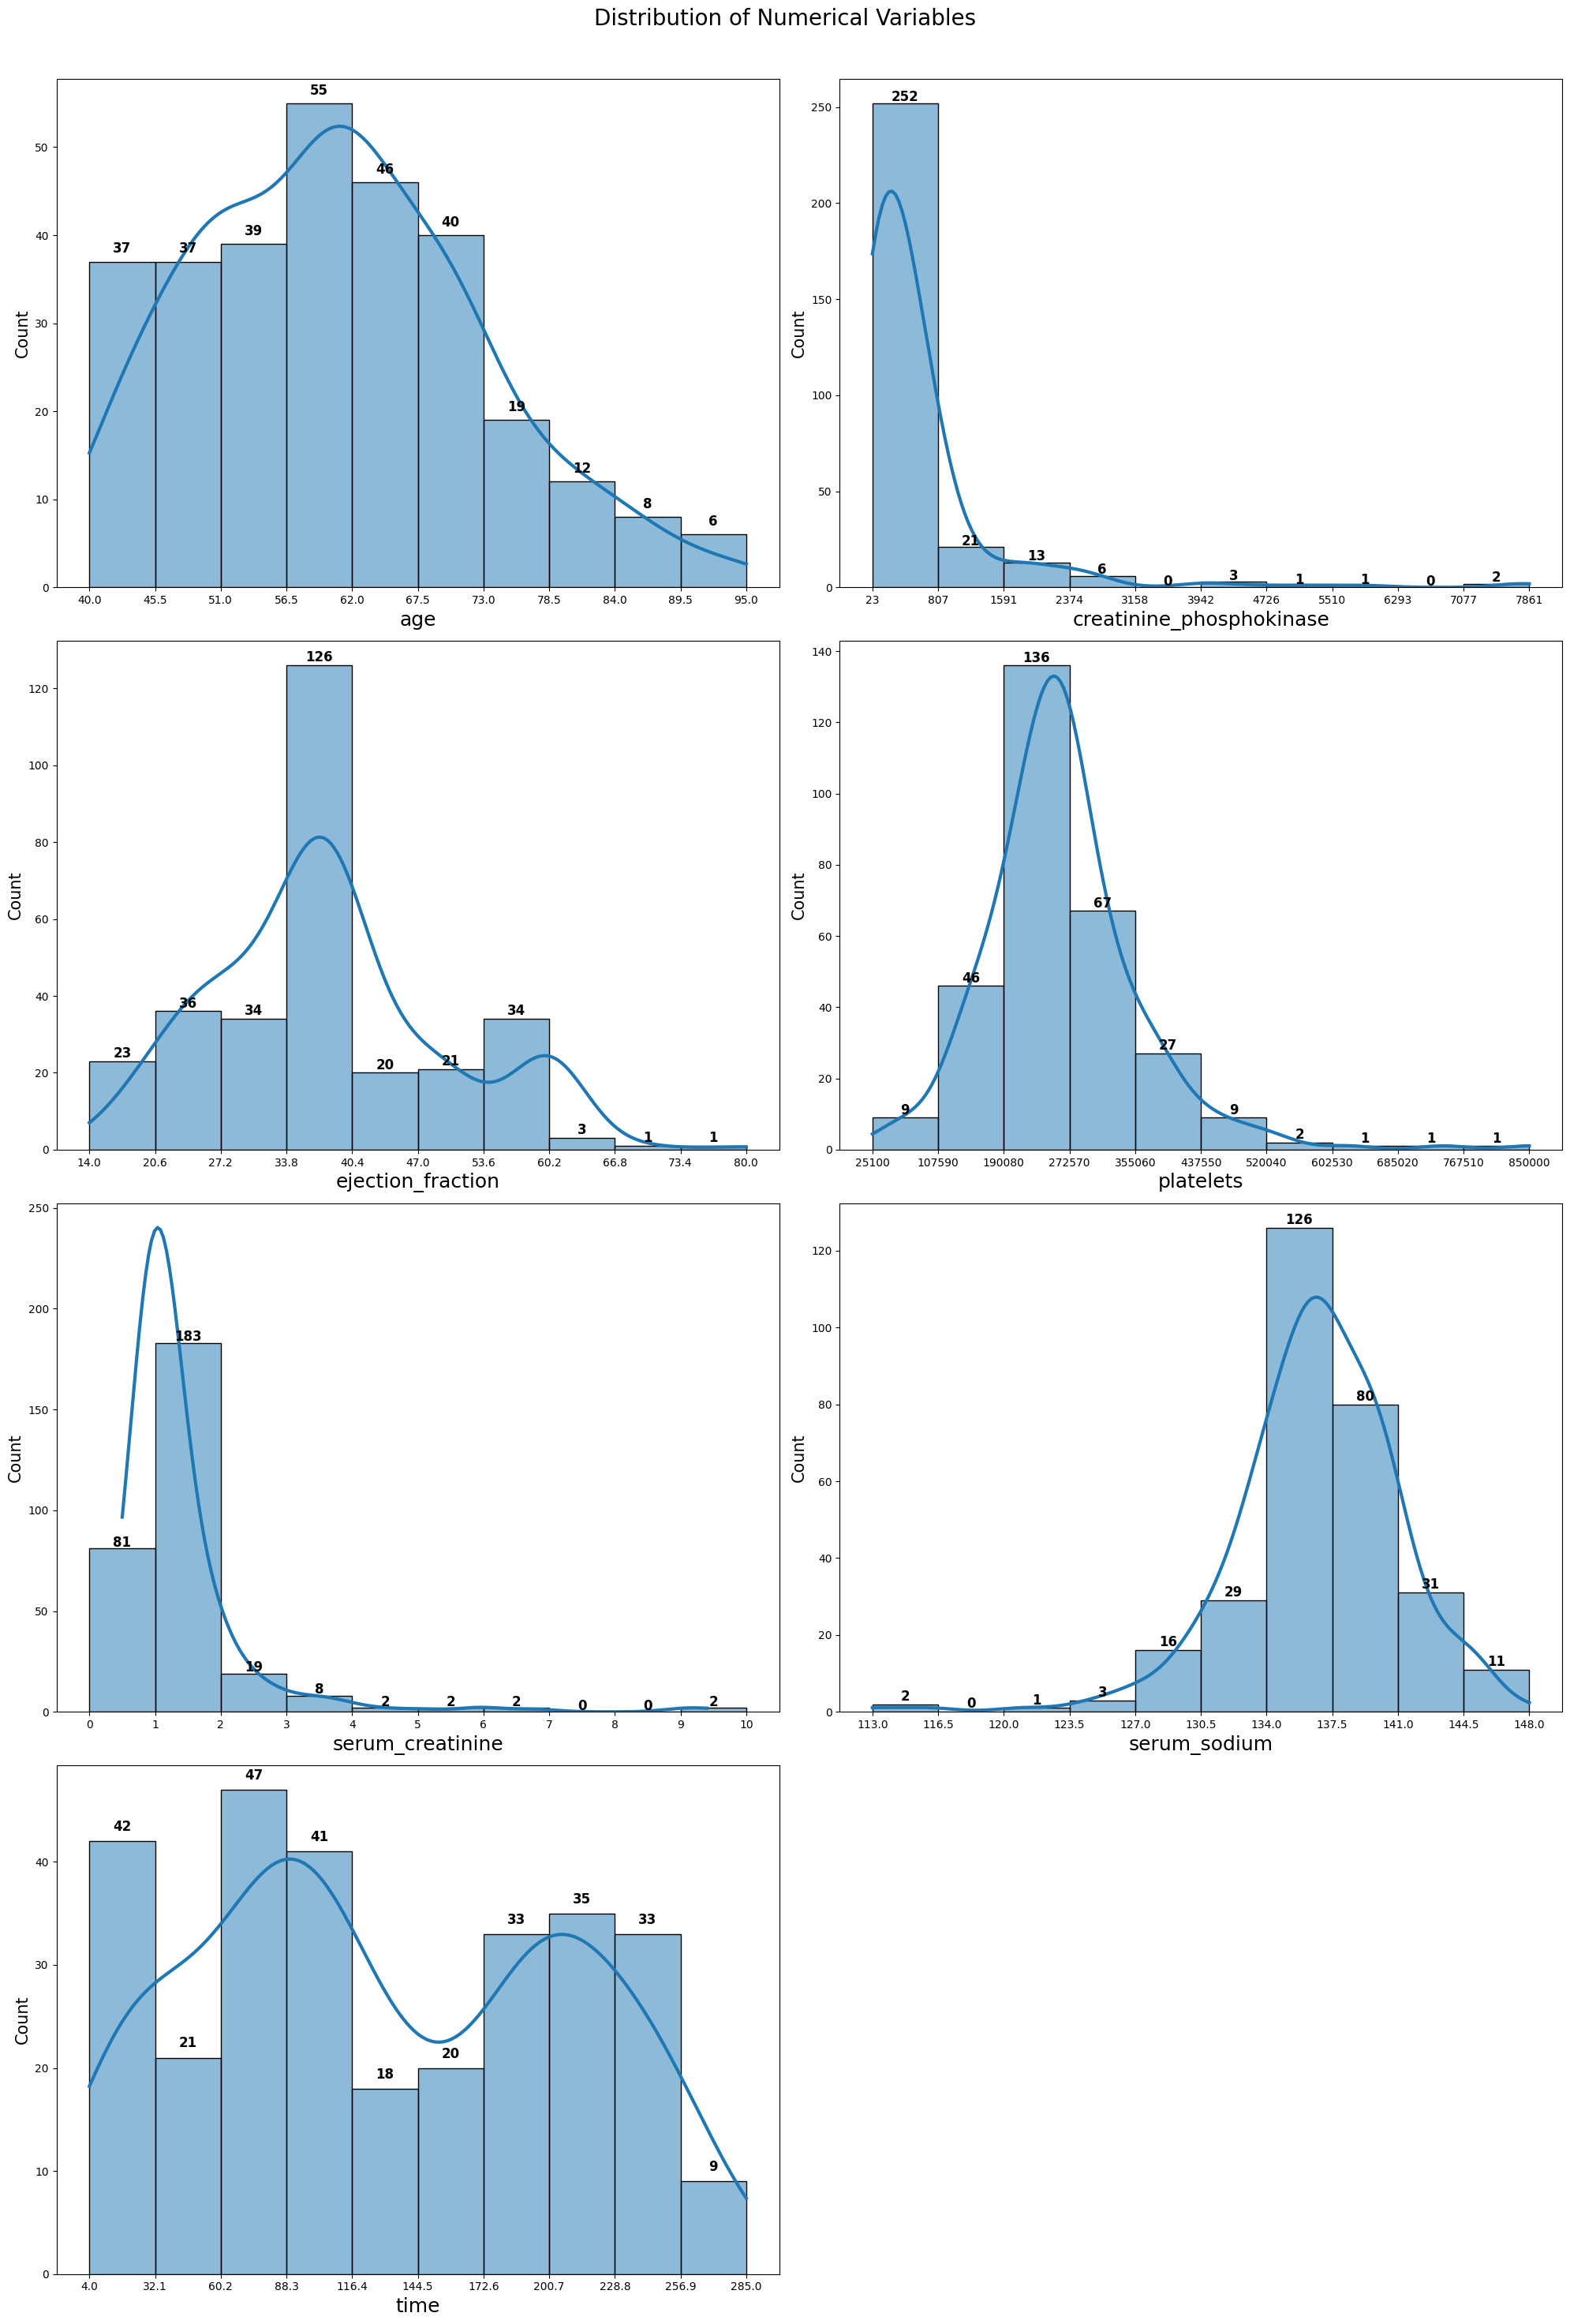

In [7]:
# Set up the subplot
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 30))

# Loop to plot histograms for each numerical feature
for i, col in enumerate(numerical_features):
    x = i // 2
    y = i % 2
    
    # Values are the number of data points that fall into each bin
    # Bin edges represent the boundaries of each bin
    values, bin_edges = np.histogram(df[col], 
                                     range=(np.floor(df[col].min()), np.ceil(df[col].max())))
    
    graph = sns.histplot(data=df, x=col, kde=True, line_kws={'lw': 3}, ax=ax[x, y], bins=bin_edges)
    ax[x, y].set_xlabel(col, fontsize=18)
    ax[x, y].set_ylabel('Count', fontsize=15)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    
    # Add counts per histogram bin
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=12, fontweight="bold")

ax[3,1].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

**Observations:**
* Age: The age variable is spread across a wide range from 40 to 95 years, but the majority of patients are in the 56 - 62 group. The mean age is 60.83 years.
* CPK Level: The CPK Level distribution is skewed to the left, where almost all patients are between 23 - 807 mcg/L. The average level is 581.84 mcg/L, which is highly above the normal range. The high std also indicate a wide range of levels of CPK. We can observe a small subset of patients with abnormally high creatinine phosphokinase, which could indicate severe heart failure or injury. These values should be observed carefully since they could also be outliers or errors in the data. 
* Ejection fraction: Most individuals have a blood ejection fraction between 33.8 to 40.4%, with a mean value of 38.08% and std of 11.83%. This mean value is considered a reduced ejection fraction according to the American Heart Association. The std is high compared to the mean, which indicates a wide range of ejection fraction percentages. A small subset of individuals have ejection fraction values between 50 - 70%, which is categorized as normal.  
* Platelets: The platelets distribution is left skewed, with the majority of patients having between 190080-272570 kiloplatelets/mL, with a mean of 263358.03 and std of 97804.24. Only a few individuals have abnoramally high quantity, which could potentially be outliers in the data. 
* Serum creatinine: The distribution is also left skewed, with almost all individuals having between 1-2 mg/dL serum creatinine in blood, with a mean of 1.393880 and std of 1.034510. The large std compared to the mean indicate that there is a wide range of values and we can observe an abnormal maximum value of 9.4.
* Serum sodium: The serum sodium distribution is right skewed, with most individuals having between 134-141 mEq/L, with a mean of 136.625418 and std 4.412477. Some patients are found below the normal range of serum sodium in blood (135-145 mEq/L), potentially indicating severe heart failure conditions.
* Team: We can observe a bimodal distribution with two peaks around 88 days and 200 days. The mean of the follow-up period is 130.26 days.

Upon reviewing the histograms of the continuous features, we notice that CPK, ejection fraction, and serum creatinine exhibit high standard deviation values. It is crucial to investigate potential outliers or data errors within the dataset, as we have observed highly abnormal values in several features. This evaluation will help ensure the integrity and reliability of our analysis.

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

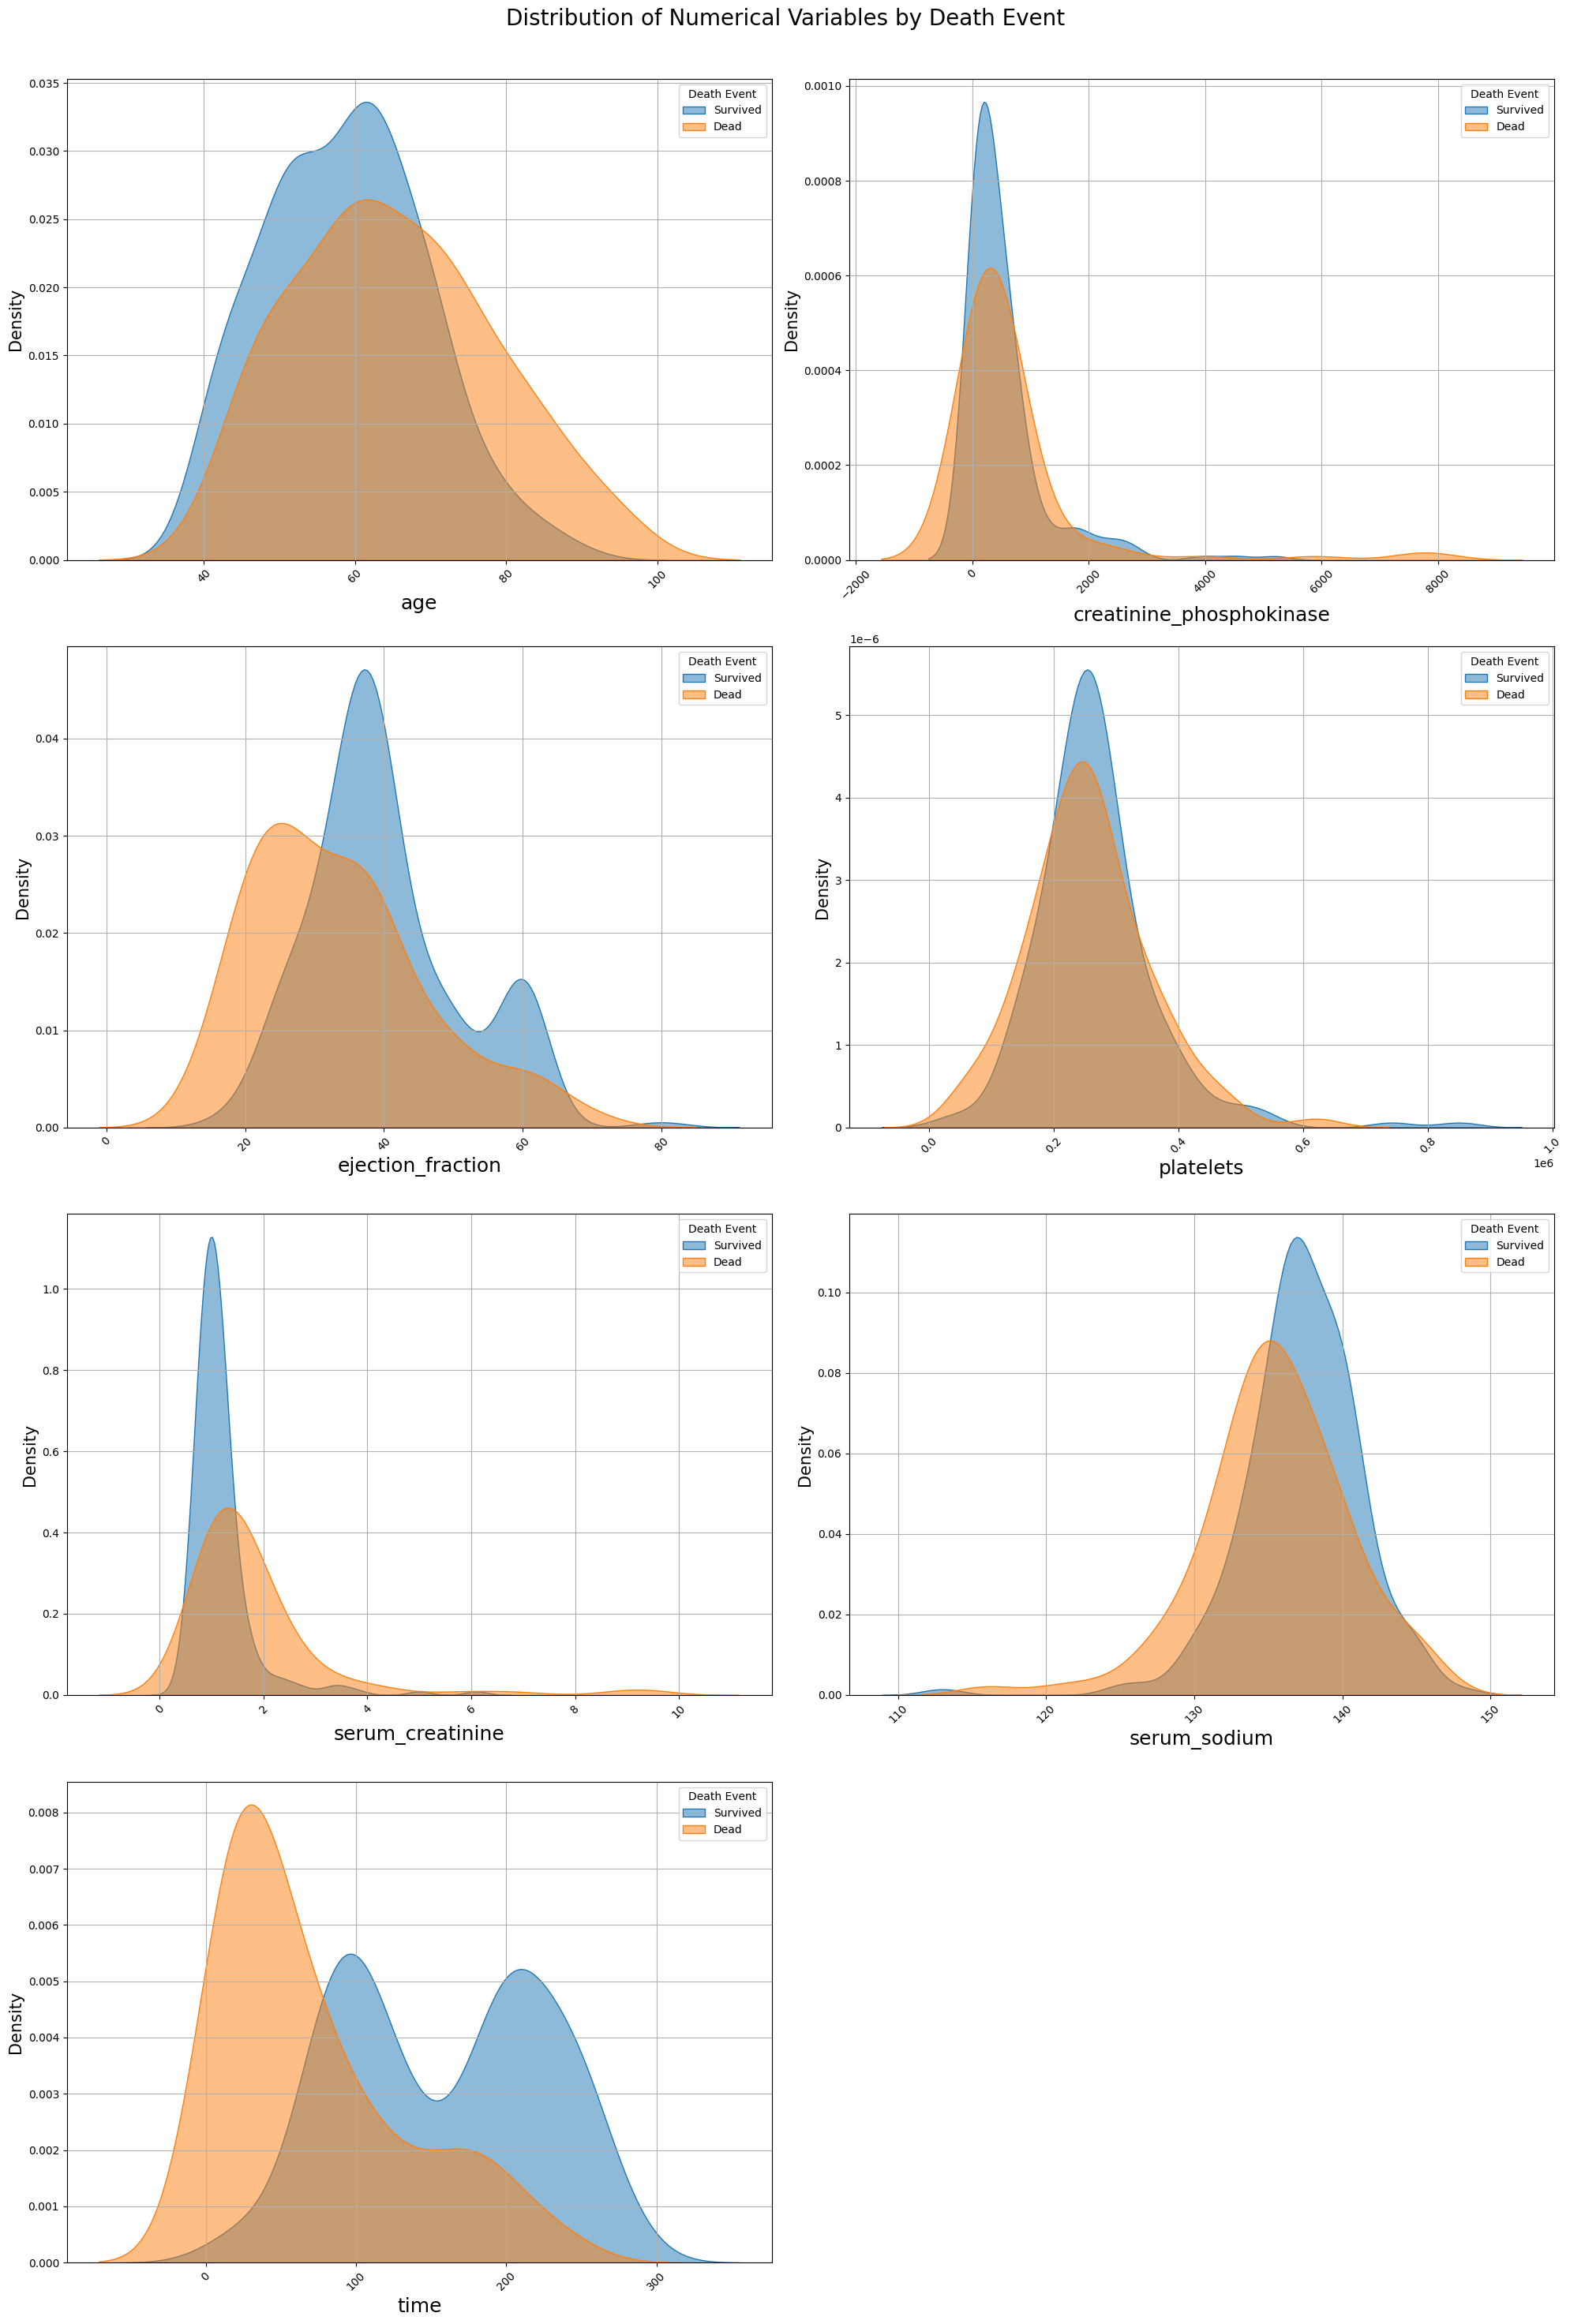

In [8]:
# Set up the subplot
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 30))

# Loop to plot KDEplots for each numerical feature
for i, col in enumerate(numerical_features):
    x = i // 2
    y = i % 2
    
    # Plot KDE for survived and dead patients
    sns.kdeplot(data=df[df['DEATH_EVENT']==0], x=col, fill = True, label = 'Survived', ax=ax[x, y], common_norm=False, alpha=0.5)
    sns.kdeplot(data=df[df['DEATH_EVENT']==1], x=col, fill = True, label = 'Dead', ax=ax[x, y], common_norm=False, alpha=0.5)
    
    # Add legend of each subplot
    ax[x,y].legend(title='Death Event', loc = 'upper right')
    ax[x, y].set_xlabel(col, fontsize=18)
    ax[x, y].set_ylabel('Density', fontsize=15)
    
    # Rotate x-tick labels for better readability
    ax[x, y].tick_params(axis='x', rotation=45)
    
    # Add gridlines to the plot
    ax[x, y].grid(True)

ax[3,1].axis('off')
plt.suptitle('Distribution of Numerical Variables by Death Event', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

**Observations:**
* Age: The two distributions are almost overlapping. The age distribution of deceased patients is skewed toward older ages, while survivors have a more symmetric distribution around 60 years. 
* CPK: Both distributions overlap, however we can that the peak of deceased patients around 500 mcg/L is much lower than the patients that survived. Extremely high CPK levels are more commonly observed among patients who died. 
* Ejection fraction: The distribution of deceased patients is shifted towards the left, indicating lower ejection fraction percentages a potential risk factor. Patients that survived have a higher density around 30% which is also below the normal range, and a small peak is observed around 60% which is above the normal ejection fraction percentage. 
* Platelets: Both distributions overlap, with a higher density of patients around 200000 kiloplatelets/mL that survived. 
* Serum creatinine: Deceased patients distribution has a wider range, a bit shifted to the right potentially indicating higher serum creatinine values as a risk factor of heart failure. We can also observe abnormally high values in this distribution. The survival distribution has a narrow range, with higher density of patients with serum creatinine values around 1 mg/dL.
* Serum sodium: Deceases patients distribution has a wider range with a tail to the left indicating lower serum sodium levels as a potential risk factor. However, a major density of deceased patients are found around 135 mEq/L, which is inside the normal range. Survival patients distribution has a narrow range, with a higher density of patients with serum sodium levels inside the normal range. 
* Time: We can observe deceased patients distribution to be shifted to the left, due to that follow-up times for these patients are lower than the survival patients. This however is not a relevant feature for heart failure indication.  

These observations suggest that a reduced ejection fraction is a significant factor for mortality, as it indicates a weakened heart with reduced pumping capacity. Moreover, elevated serum creatinine levels are associated with increased risk of death in heart failure patients. High serum creatinine could signify worsening renal function, which often coexists with heart failure and contributes to poor prognosis.

**Statistical Analysis of Categorical Features**

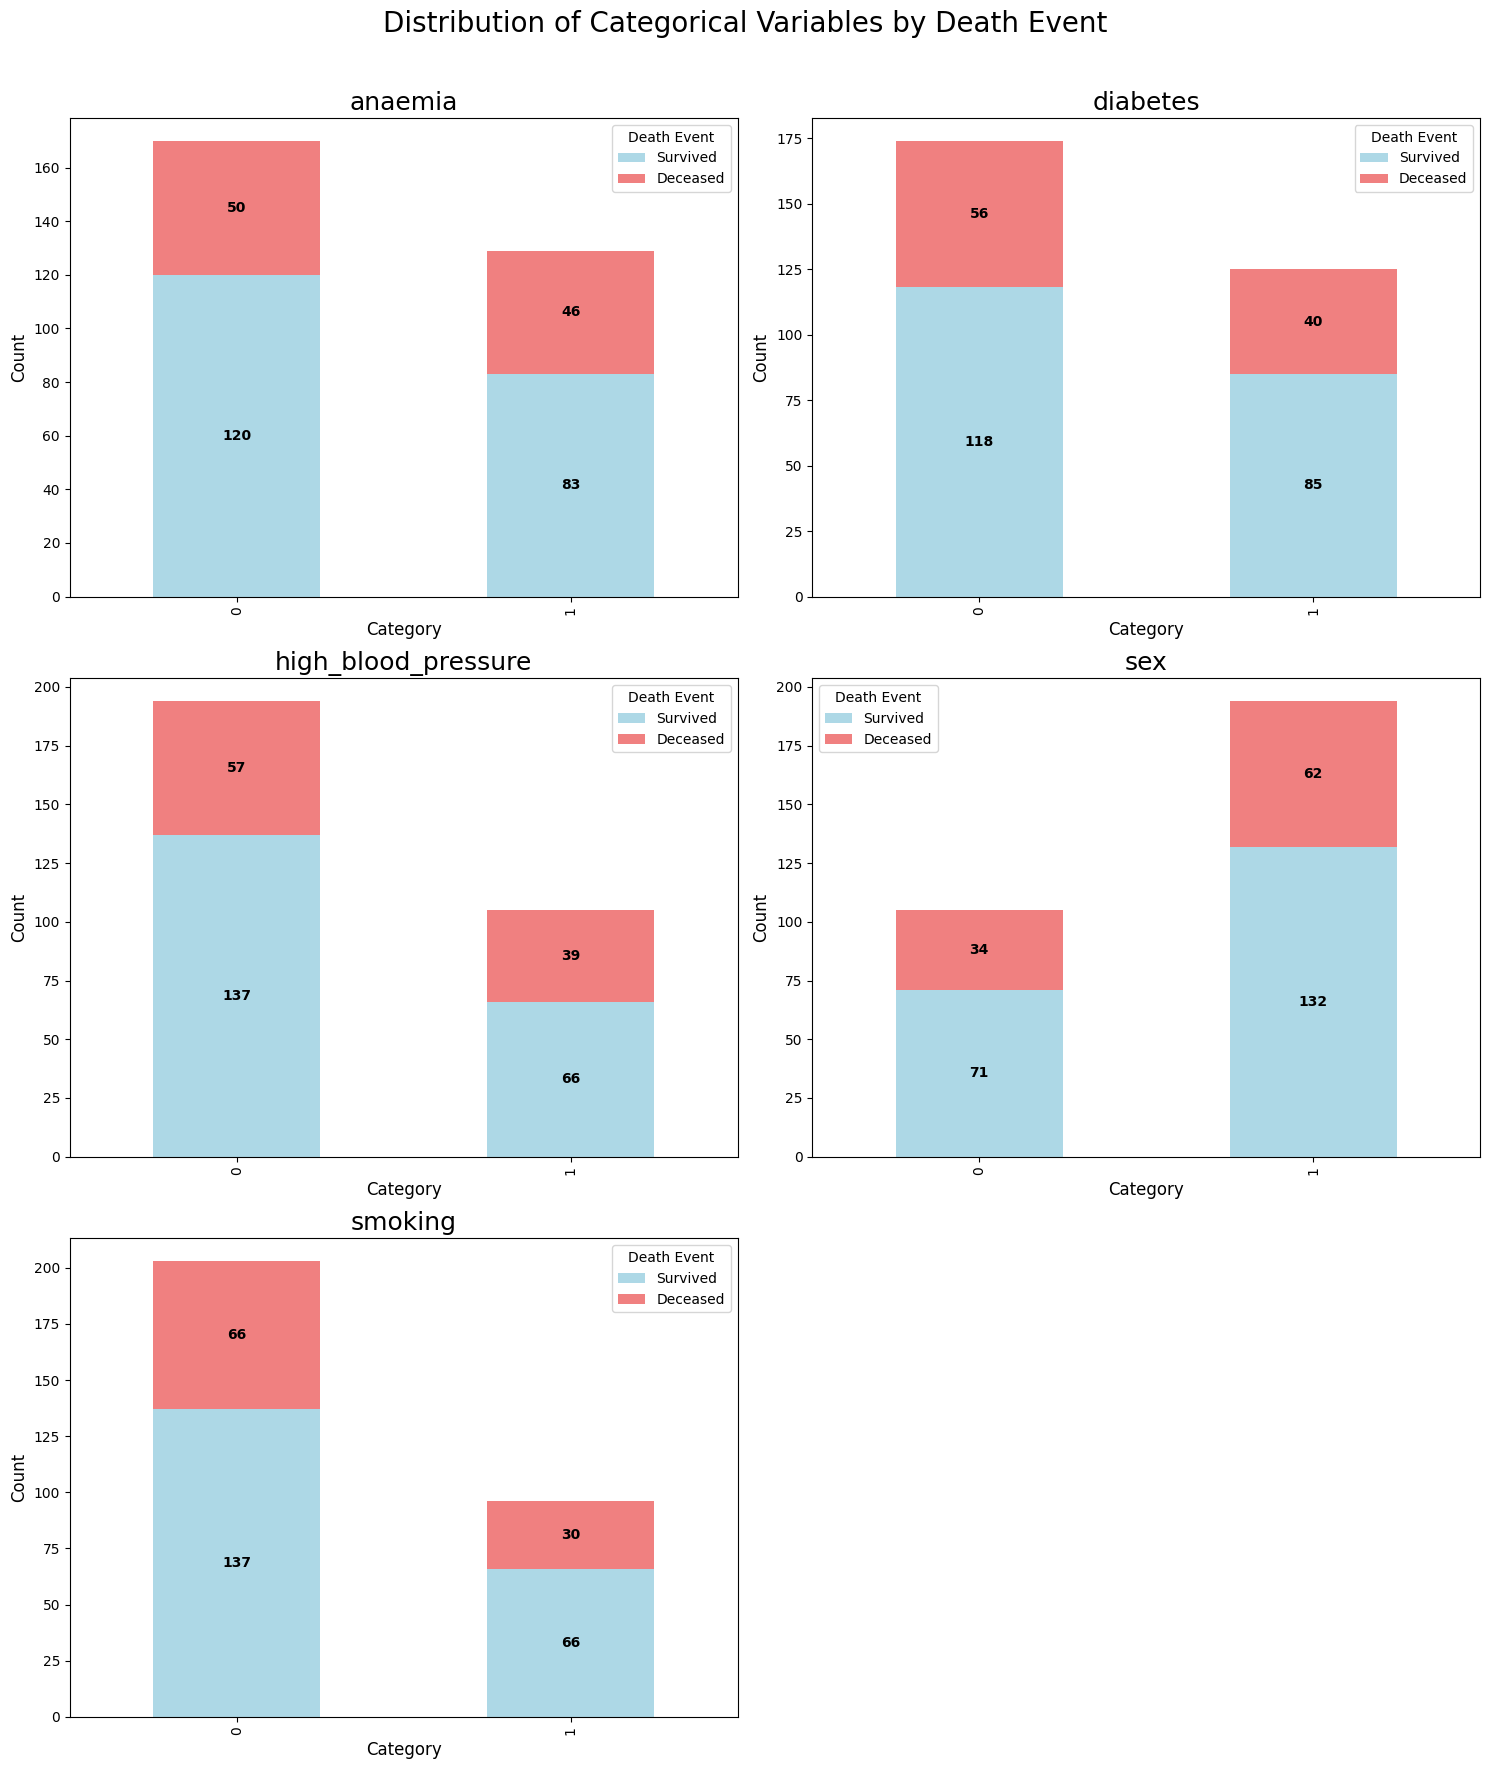

In [9]:
# Define categorical features and target
categorical_features_target = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df_categorical = df[categorical_features_target]

# Set up the subplot for a layout
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))

# Loop to plot stacked bar charts for each categorical feature
for i, col in enumerate(categorical_features_target[:-1]):
    row = i // 2
    col_idx = i % 2
    
    # Group the data by the categorical feature and target variable
    stacked_counts = df.groupby([col, 'DEATH_EVENT']).size().unstack(fill_value=0)
    
    # Plot stacked bar chart
    bars = stacked_counts.plot(kind='bar', stacked=True, ax=ax[row, col_idx], color=['lightblue', 'lightcoral'])
    
    # Add counts to the bars
    for bar in bars.patches:
        height = bar.get_height()
        ax[row, col_idx].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, int(height), 
                              ha='center', va='center', fontsize=10, color='black', weight='bold')
    ax[row, col_idx].set_title(f'{col}', fontsize=18)
    ax[row, col_idx].set_ylabel('Count', fontsize=12)
    ax[row, col_idx].set_xlabel('Category', fontsize=12)
    ax[row, col_idx].legend(title='Death Event', labels=['Survived', 'Deceased'])

ax[2,1].axis('off')
plt.suptitle('Distribution of Categorical Variables by Death Event', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

**Observations:**
* Anaemia: The presence of anaemia seems to be associated with a slightly higher death rate. Patients without anaemia have a survival rate of 70.59%, while those with anaemia show a decreased survival rate of 64.34%. This suggests that anaemia might play a role in patient outcomes, though the difference in survival rates is not very pronounced.
* Diabetes: The survival rate is nearly identical between patients with and without diabetes, with 68% of diabetic patients surviving compared to 67.82% of non-diabetic patients. This suggests that, within this dataset, diabetes may not be a strong independent predictor of mortality.
* High blood pressure: High blood pressure appears to have a more significant impact on survival outcomes. Patients without high blood pressure have a relatively higher survival rate of 70.61%, whereas patients with high blood pressure have a survival rate of only 62.86%. This indicates a potential link between hypertension and worse prognosis.
* Sex: The dataset is skewed towards males, with 194 male patients and 105 female patients. The survival rates, however, are nearly the same for both sexes: 68.04% for males and 67.62% for females. This suggests that gender alone may not be a determining factor for survival in this population.
* Smoking: The number of non-smokers in the dataset is more than double the number of smokers (203 non-smokers vs. 96 smokers). Interestingly, the survival rate is slightly higher among smokers (68.75%) compared to non-smokers (67.49%). This could either indicate a confounding effect, such as younger age in smokers, or that smoking status is not strongly predictive of survival in this particular cohort.

Based on these observations, high blood pressure is likely to be a strong indicator of mortality risk in heart failure patients. 


**Identification of outliers**

Outliers are extreme values that significantly differ from the majority of data points within a dataset. They can substantially impact statistical analyses and skew the results of hypothesis tests.

* **CPK Levels**: In our dataset, we have identified four patients with extremely high creatine phosphokinase (CPK) levels, exceeding 5000 mcg/L. Elevated CPK levels can occur in patients experiencing significant muscle damage, which may correlate with poorer outcomes in heart failure. Given this clinical context, the information from these patients is not merely an outlier; rather, it holds valuable insights into the relationship between muscle damage and heart failure prognosis. Therefore, these patients should remain included in the dataset for comprehensive analysis.

* **Serum Creatinine Levels**: Conversely, we have also identified five patients with serum creatinine levels greater than 5.0 mg/dL. Such levels typically indicate critical kidney failure and suggest severe renal impairment. The data from these patients is crucial for understanding the interplay between renal function and heart failure outcomes. As with the CPK levels, these observations should not be discarded, as they contribute to the overall understanding of patient health status and treatment considerations.


**Survival Prediction Classifiers**

This part of the analysis is structured into two main parts:
1. **Binary Prediction of Patient Survival:** 
The first part focuses on building and evaluating models to predict patient survival during the follow-up period using the entire dataset. We will implement and compare various machine learning models to identify the best-performing classifier. These models include:
* **Logistic Regression**: Statistical model that uses the logistic function to model a binary dependent variable (e.g., survival: 0 or 1). It estimates the probability that a given input point belongs to a particular category.
* **Decision Trees**: Decision trees partition the data into subsets based on feature values. They recursively split the data into branches, creating a tree-like structure where each node represents a feature and each leaf represents an outcome.
* **Random Forests**: Ensemble method that builds multiple decision trees during training and outputs the mean of the classes (classification) or mean prediction (regression) of the individual trees. 
* **Support Vector Machines**: SVM works by finding a hyperplane that best divides a dataset into two classes. It maximizes the margin between the closes points (support vectors) of each class. 
* **k-Nearest Neighbors**: Non-parametric, supervised learning classifier, which classifies a data point based on how its neighbors are classified. It looks at the K closest data points (neighbors) in the feature space and assigns the majority class (for classification).
* **Naïve Bayes**: Probabilistic classifier which applies Bayes’ theorem with the assumption that the presence of a feature in a class is independent of other features. This means that each feature contributes independently to the probability of the class label.
* **Gradient Boosting**: Ensemble boosting method, which build trees sequentially where each new tree corrects errors made by the previous ones. 
* **Neural Networks**: Neural networks consist of interconnected layers of nodes (neurons) that transform input data through weights and activation functions. They can model complex non-linear relationships.
2. **Feature Ranking and Model Refinement:**
The second part of the analysis aims to identify the most influential features in predicting patient mortality. We will leverage SHAP (SHapley Additive exPlanations) on the best performing model for a more detailed breakdown of feature contributions. Using these insights, we will:
* Rank features based on their impact on model performance.
* Retrain the best-performing model using only the top-ranked features to evaluate whether this improves generalization and predictive power.

By combining a diverse set of models and feature ranking techniques, this analysis aims to build an accurate and interpretable model for predicting patient outcomes, while also identifying key factors influencing mortality.

**Evaluation Metrics**

Evaluation metrics are crucial for assessing the performance of predictive models. The process typically involves training a model on a dataset and then using it to make predictions on a separate test dataset that was not utilized during training. By comparing the model's predictions with the actual expected values in the test set, we can quantify its effectiveness. In classification problems, these metrics focus on comparing the predicted class labels to the actual class labels.

In this analysis, we will employ various classification metrics, particularly considering the class imbalance in our dataset. As previously noted, 203 patients survived heart failure, while 96 patients did not, indicating that more than twice as many patients survived compared to those who died. For clarity, we define the positive class as patients who died and the negative class as patients who survived.

1. **Accuracy**: The ratio of correctly predicted instances (both true positives and true negatives) to the total instances.
2. **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
3. **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to the actual positives.
4. **F1 Score**: The harmonic mean of precision and recall. It balances the two metrics and is particularly useful when the class distribution is imbalanced.
5. **ROC Curve**: A graphical representation of the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings.
6. **Confusion Matrix:** A table that describes the performance of a classification model by comparing the predicted and actual classes.
7. **Matthews Correlation Coefficient**: A measure of the quality of binary classifications, which takes into account true and false positives and negatives.

**Data Splitting**

To effectively evaluate our model’s performance, we will begin by splitting our dataset into a training set and a test set. The test set will remain untouched during the training and preprocessing phases, providing an unbiased assessment of the model's accuracy.

For models that require hyperparameter tuning, we will further divide the training set into a validation set. This validation set is utilized during the training process to optimize hyperparameters, helping to minimize loss and reduce the risk of overfitting.

For the dataset splitting, we will leverage scikit-learn, a powerful machine learning library in Python, which provides robust tools for handling data partitioning.

In [10]:
# Specify features and target
X = df.drop(columns=['DEATH_EVENT', 'time'])  # Features (time feature will be removed to focus only on patient's clinical features)
y = df['DEATH_EVENT']                         # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.2,         # 20% of data will be used for testing
    random_state=42,       # For reproducibility
    stratify=y             # Maintain the proportion of the target classes
)

# Split the training set into training and validation sets 
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2,         # 20% of the training data for validation
    random_state=42,       # For reproducibility
    stratify=y_train       # Maintain the proportion of the target classes
)

# Check the sizes
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

# Check target variable in train, val and test sets
print("\nTarget variable distribution in the training set:")
print(y_train.value_counts())
print("\nTarget variable distribution in the validation set:")
print(y_val.value_counts())
print("\nTarget variable distribution in the test set:")
print(y_test.value_counts())

Training set size: 191
Validation set size: 48
Test set size: 60

Target variable distribution in the training set:
DEATH_EVENT
0    129
1     62
Name: count, dtype: int64

Target variable distribution in the validation set:
DEATH_EVENT
0    33
1    15
Name: count, dtype: int64

Target variable distribution in the test set:
DEATH_EVENT
0    41
1    19
Name: count, dtype: int64


**Transforming Skewed Features**

Many statistical methods and machine learning algorithms perform better when the data is normally distributed. The Box-Cox transformation helps in achieving that. It is a statistical technique used to stabilize variance and make the data more closely to a normal distribution. It only works for positive data, so one must be cautious when applying it to features that contain zeros or negative values.

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

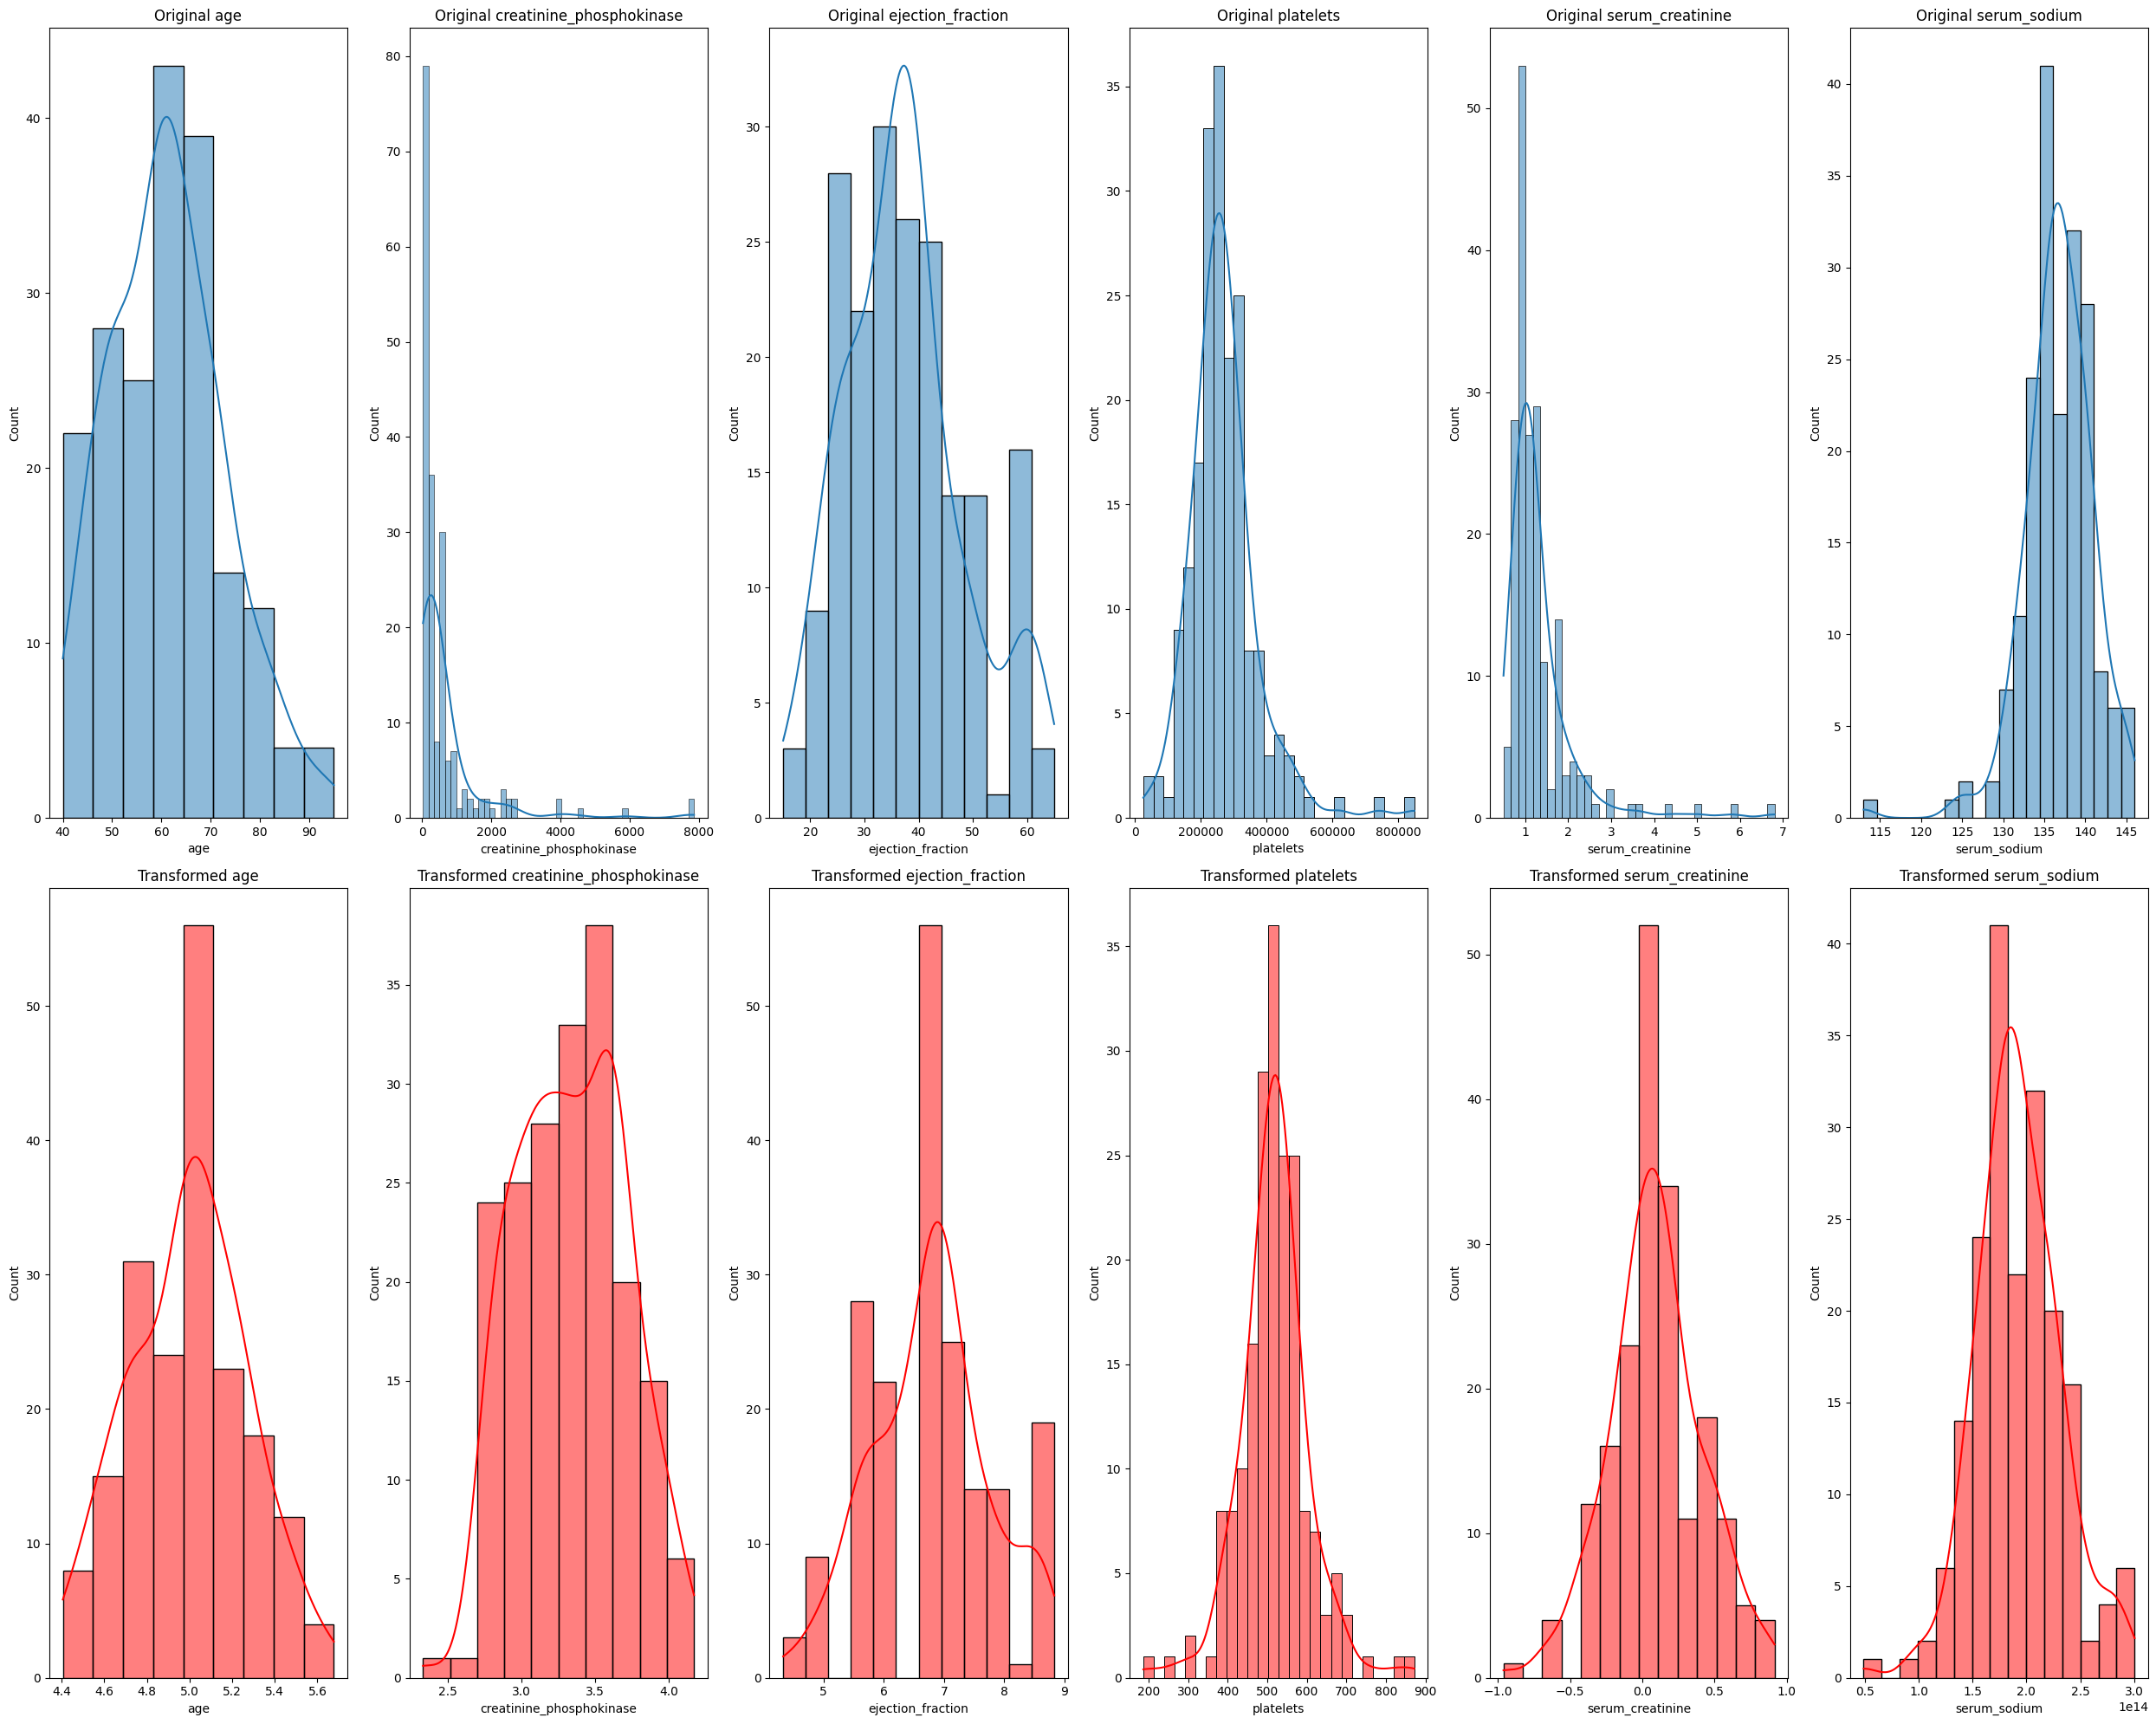

In [21]:
# Checking the distribution of the numerical features
fig, ax = plt.subplots(2, 6, figsize=(25,20))

# Original Distributions
for i, col in enumerate(numerical_features[:-1]):
    sns.histplot(X_train[col], kde=True, ax=ax[0,i]).set_title(f'Original {col}')
    

# Applying Box-Cox Transformation
# Dictionary to store lambda values for each feature
lambdas = {}

for i, col in enumerate(numerical_features[:-1]):
    # Only apply box-cox for positive values
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Applying the same lambda to validation and test data
        X_val[col]=boxcox(X_val[col], lmbda=lambdas[col])
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col]) 
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='red').set_title(f'Transformed {col}')
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'{col} (Not Transformed)')

fig.tight_layout()
plt.show()

**Feature Scaling**

Feature scaling is a crucial step in the preprocessing of data for machine learning models. It involves normalizing or standardizing the range of feature values, ensuring that they are comparable in scale.  

Many machine learning algorithms, particularly those that rely on gradient descent optimization (e.g., logistic regression, neural networks), converge faster when features are on a similar scale. If one feature has a much larger range than others, the model can struggle to learn effectively, resulting in slow convergence or failure to converge. 

Algorithms such as k-nearest neighbors (KNN) and support vector machines (SVM) use distance metrics (e.g., Euclidean distance) to determine the relationship between data points. If features are not scaled, those with larger ranges will dominate the distance calculations, skewing the results.

Feature scaling is performed after data splitting to avoid data leakage. It is typically applied using techniques like Min-Max Scaling and Standardization (Z-score Normalization). We will use Min-Max Scaling since our data does not contain outliers and we want the features to be in a specific range like [0, 1].

In [22]:
# Initialize the scaler
min_max_scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = min_max_scaler.fit_transform(X_train)

# Transform the validation/test data
X_val_scaled = min_max_scaler.transform(X_val)
X_test_scaled = min_max_scaler.transform(X_test)

**Binary Prediction of Patient Survival**

Model Training and Evaluation

In [24]:
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    """
    Evaluates the performance of a trained model on training and validation data 
    to see if the model is overfitting.
    """
    # Make predictions on training and validation data
    y_pred_tr = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Get classification metrics for training
    metrics_train = {
        "Accuracy": accuracy_score(y_train, y_pred_tr),
        "Precision": precision_score(y_train, y_pred_tr, pos_label=1),
        "Recall": recall_score(y_train, y_pred_tr, pos_label=1),
        "F1 Score": f1_score(y_train, y_pred_tr, pos_label=1),
        "ROC-AUC": roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
        "MCC": matthews_corrcoef(y_train, y_pred_tr)
    }
    
    # Get classification metrics for validation
    metrics_val = {
        "Accuracy": accuracy_score(y_val, y_pred_val),
        "Precision": precision_score(y_val, y_pred_val, pos_label=1),
        "Recall": recall_score(y_val, y_pred_val, pos_label=1),
        "F1 Score": f1_score(y_val, y_pred_val, pos_label=1),
        "ROC-AUC": roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]),
        "MCC": matthews_corrcoef(y_val, y_pred_val)
    }
    
    # Convert metrics dictionaries to DataFrames
    df_metrics_train = pd.DataFrame(metrics_train, index=[model_name + " (Train)"]).round(2)
    df_metrics_val = pd.DataFrame(metrics_val, index=[model_name + " (Validation)"]).round(2)
    
    # Concatenate the two DataFrames for clear comparison
    df_metrics = pd.concat([df_metrics_train, df_metrics_val])
    
    """
    
    # Calculate ROC Curve for training and validation
    fpr_tr, tpr_tr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
    fpr_val, tpr_val, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
    
    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_tr, tpr_tr, color='blue', lw=2, label=f'Train ROC curve (area = {metrics_train["ROC-AUC"]:.2f})')
    plt.plot(fpr_val, tpr_val, color='green', lw=2, label=f'Validation ROC curve (area = {metrics_val["ROC-AUC"]:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    # Calculate and plot confusion matrices for training and validation
    cm_train = confusion_matrix(y_train, y_pred_tr)
    cm_val = confusion_matrix(y_val, y_pred_val)

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot confusion matrix for training data
    ConfusionMatrixDisplay(confusion_matrix=cm_train).plot(ax=ax[0], cmap='Blues')
    ax[0].set_title(f"Confusion Matrix - Training ({model_name})")

    # Plot confusion matrix for validation data
    ConfusionMatrixDisplay(confusion_matrix=cm_val).plot(ax=ax[1], cmap='Blues')
    ax[1].set_title(f"Confusion Matrix - Validation ({model_name})")

    plt.tight_layout()
    plt.show()
    """
    
    return df_metrics, metrics_val

1. **Logistic Regression**

In [41]:
# Initialize the Logistic Regression Model
logistic_model = LogisticRegression(random_state=0, max_iter=200)

# Train the model
logistic_model.fit(X_train_scaled, y_train)

# Call the evaluation function
df_metrics_lr, metrics_val_lr = evaluate_model(logistic_model, X_train_scaled, y_train, X_val_scaled, y_val, 'Logistic Regression')

# Print train and validation metrics
print(df_metrics_lr)

# Initialize a list to store validation metrics for comparison
validation_metrics_list = []

# Append Logistic Regression Validation Metrics 
validation_metrics_list.append(metrics_val_lr)

                                  Accuracy  Precision  Recall  F1 Score  \
Logistic Regression (Train)           0.74       0.71    0.32      0.44   
Logistic Regression (Validation)      0.73       0.58    0.47      0.52   

                                  ROC-AUC   MCC  
Logistic Regression (Train)          0.83  0.34  
Logistic Regression (Validation)     0.80  0.34  


**Observations:**
The Logistic Regression model demonstrates some capability in distinguishing classes (as indicated by the ROC-AUC scores), but it has significant limitations in terms of precision, recall, and F1 score. The low recall suggests that the model is likely missing many critical cases of patient mortality, which is particularly concerning in a medical context where failing to identify at-risk patients can have serious consequences.

2. **Decision Trees**

In [42]:
# Initialize Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=0)

# Define the hyperparameter grid
param_grid_dt = {
    'max_depth': [None, 2, 5],              # Different maximum depths
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [2, 5, 10],         # Minimum samples required to be at a leaf node
    'criterion': ['entropy', 'gini']        # Gini impurity or entropy
}

# Create GridSearch object
dt_grid = GridSearchCV(dt_model, param_grid=param_grid_dt, scoring='recall', cv=5, n_jobs=1, verbose=1)

# Train the model
dt_grid.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {dt_grid.best_params_}")
print(f"Best Cross-validation Score: {dt_grid.best_score_:.4f}")

# Evaluate the model with the best parameters on the validation set
best_model_dt = dt_grid.best_estimator_
df_metrics_dt, metrics_val_dt = evaluate_model(best_model_dt, X_train_scaled, y_train, X_val_scaled, y_val, 'Decision Tree')

# Print train and validation metrics
print(df_metrics_dt)

# Append Decision Tree Validation Metrics 
validation_metrics_list.append(metrics_val_dt)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-validation Score: 0.6462
                            Accuracy  Precision  Recall  F1 Score  ROC-AUC  \
Decision Tree (Train)           0.79       0.66    0.71      0.68     0.78   
Decision Tree (Validation)      0.77       0.60    0.80      0.69     0.81   

                             MCC  
Decision Tree (Train)       0.52  
Decision Tree (Validation)  0.52  


**Observations:**
The Decision Tree model demonstrates a balanced performance across training and validation datasets. The model has a good accuracy rate and shows a commendable ability to detect actual positive cases (as indicated by the high recall). However, the decrease in precision during validation suggests that there are some patients being misclassified as high-risk who do not actually belong to that category.

3. **Random Forests**

In [43]:
# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=0)

# Define the hyperparameter grid
param_grid_rf = {
    'max_depth': [None, 2, 5],              # Different maximum depths
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [2, 5, 10],         # Minimum samples required to be at a leaf node
    'criterion': ['entropy', 'gini']        # Gini impurity or entropy
}

# Create GridSearch object
rf_grid = GridSearchCV(rf_model, param_grid=param_grid_rf, scoring='recall', cv=5, n_jobs=1, verbose=1)

# Train the model
rf_grid.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Best Cross-validation Score: {rf_grid.best_score_:.4f}")

# Evaluate the model with the best parameters on the validation set
best_model_rf = rf_grid.best_estimator_
df_metrics_rf, metrics_val_rf = evaluate_model(best_model_rf, X_train_scaled, y_train, X_val_scaled, y_val, 'Random Forest')

# Print train and validation metrics
print(df_metrics_rf)

# Append Random Forest Validation Metrics 
validation_metrics_list.append(metrics_val_rf)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Cross-validation Score: 0.5000
                            Accuracy  Precision  Recall  F1 Score  ROC-AUC  \
Random Forest (Train)           0.95       1.00    0.85      0.92     1.00   
Random Forest (Validation)      0.77       0.62    0.67      0.65     0.88   

                             MCC  
Random Forest (Train)       0.89  
Random Forest (Validation)  0.48  


**Observations:**
The Random Forest model exhibits excellent performance metrics on the training dataset, characterized by high accuracy, precision, and ROC-AUC scores. However, the significant drop in these metrics on the validation set raises concerns about overfitting. This model appears to be overly complex, capturing noise in the training data rather than learning to generalize from the patterns present.

4. **Support Vector Machines**

In [44]:
# Initialize SVC
svc_model = SVC(probability=True)

# Define the hyperparameter grid
param_grid_svc = {
    'C': [0.01, 0.1, 1, 10, 100],                 # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],          # Different kernel types
    'gamma': ['scale', 'auto', 0.1, 1, 10]        # Kernel coefficient for RBF kernel
}

# Create GridSearch object
svc_grid = GridSearchCV(svc_model, param_grid=param_grid_svc, scoring='recall', cv=5, n_jobs=-1, verbose=1)

# Train the model using Grid Search
svc_grid.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {svc_grid.best_params_}")
print(f"Best Cross-validation Score: {svc_grid.best_score_:.4f}")

# Get the best model from the grid search
best_model_svc = svc_grid.best_estimator_

# Evaluate the best model on the validation set
df_metrics_svc, metrics_val_svc = evaluate_model(best_model_svc, X_train_scaled, y_train, X_val_scaled, y_val, 'Support Vector Machine')

# Print train and validation metrics
print(df_metrics_svc)

# Append SVC Validation Metrics
validation_metrics_list.append(metrics_val_svc)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-validation Score: 0.5308
                                     Accuracy  Precision  Recall  F1 Score  \
Support Vector Machine (Train)           0.79       0.72    0.58      0.64   
Support Vector Machine (Validation)      0.77       0.61    0.73      0.67   

                                     ROC-AUC  MCC  
Support Vector Machine (Train)          0.83  0.5  
Support Vector Machine (Validation)     0.81  0.5  


**Observations:**
The Support Vector Machine (SVM) model demonstrates moderate performance across training and validation datasets. While it shows reasonable accuracy and ROC-AUC scores, the model has some limitations, particularly in precision and recall, with notable drops in precision on the validation set. The improved recall in the validation set is promising, as it indicates a greater ability to identify at-risk patients.

5. **K-Nearest Neighbor**

In [45]:
# Initialize the KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model 
knn_model.fit(X_train_scaled, y_train)

# Evaluate the best model on the validation set
df_metrics_knn, metrics_val_knn = evaluate_model(knn_model, X_train_scaled, y_train, X_val_scaled, y_val, 'K-Nearest Neighbor')

# Print train and validation metrics
print(df_metrics_knn)

# Append Validation Metrics
validation_metrics_list.append(metrics_val_knn)

                                 Accuracy  Precision  Recall  F1 Score  \
K-Nearest Neighbor (Train)           0.80       0.79    0.53      0.63   
K-Nearest Neighbor (Validation)      0.62       0.38    0.33      0.36   

                                 ROC-AUC   MCC  
K-Nearest Neighbor (Train)          0.87  0.52  
K-Nearest Neighbor (Validation)     0.66  0.09  


**Observations:**
The K-Nearest Neighbor (KNN) model exhibits mixed performance across the training and validation datasets. While it demonstrates decent accuracy and ROC-AUC scores on the training set, the substantial drop in metrics on the validation set raises significant concerns regarding overfitting and generalization. The KNN model's low precision, recall, and F1 scores in the validation set indicate that it is not reliably identifying critical patients, which is a serious issue in a medical context. 

6. **Naïve Bayes**

In [72]:
# Initialize the Naïve Bayes Classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

# Call the evaluation function
df_metrics_nb, metrics_val_nb = evaluate_model(nb_model, X_train_scaled, y_train, X_val_scaled, y_val, 'Naïve Bayes')

# Print train and validation metrics
print(df_metrics_nb)

# Append Naive Bayes Validation Metrics 
validation_metrics_list.append(metrics_val_nb)

                          Accuracy  Precision  Recall  F1 Score  ROC-AUC   MCC
Naïve Bayes (Train)           0.78       0.72    0.53      0.61     0.84  0.47
Naïve Bayes (Validation)      0.79       0.65    0.73      0.69     0.89  0.53


**Observations:**
The Naïve Bayes model exhibits strong performance across both training and validation datasets. The accuracy remains consistent, and the improvement in recall and F1 score on the validation set is encouraging, indicating that the model is effective at identifying at-risk patients. The relatively high ROC-AUC scores further suggest that the model can discriminate well between the two classes, which is critical in the context of predicting patient mortality from heart failure.

7. **Gradient Boosting**

In [47]:
# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier()

# Define the hyperparameter grid
param_grid_gb = {                
    'learning_rate': [0.01, 0.1],              # Learning rate
    'max_depth': [2, 5, 10],                   # Maximum depths
    'min_samples_leaf': [2, 5, 10],            # Minimum samples at a leaf node
    'subsample': [0.6, 0.8, 1.0]               # Fraction of samples used for each tree
}

# Create GridSearch object
gb_grid = GridSearchCV(gb_model, param_grid=param_grid_gb, scoring='recall', cv=5, n_jobs=1, verbose=1)

# Train the model
gb_grid.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {gb_grid.best_params_}")
print(f"Best Cross-validation Score: {gb_grid.best_score_:.4f}")

# Evaluate the model with the best parameters on the validation set
best_model_gb = gb_grid.best_estimator_
df_metrics_gb, metrics_val_gb = evaluate_model(best_model_gb, X_train_scaled, y_train, X_val_scaled, y_val, 'Gradient Boosting')

# Print train and validation metrics
print(df_metrics_gb)

# Append Validation Metrics 
validation_metrics_list.append(metrics_val_gb)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 10, 'subsample': 0.6}
Best Cross-validation Score: 0.5615
                                Accuracy  Precision  Recall  F1 Score  \
Gradient Boosting (Train)           1.00        1.0    1.00      1.00   
Gradient Boosting (Validation)      0.69        0.5    0.67      0.57   

                                ROC-AUC   MCC  
Gradient Boosting (Train)          1.00  1.00  
Gradient Boosting (Validation)     0.84  0.34  


**Observations:**
The Gradient Boosting model exhibits a significant performance disparity between the training and validation datasets. The high training metrics indicate that the model fits the training data exceptionally well, but the substantial drops on the validation set metrics raise concerns about overfitting.

8. **Neural Networks**

In [48]:
# Initialize the MLP Classifier
mlp_model = MLPClassifier()

# Define the hyperparameter grid
param_grid_mlp = {
    'learning_rate_init': [0.0001, 0.001, 0.01],           # Initial learning rate
    'max_iter': [2000, 3000],                              # Number of iterations
    'alpha': [0.01, 0.1]                                   # Parameter used for L2 regularization
}

# Create GridSearch object
mlp_grid = GridSearchCV(mlp_model, param_grid=param_grid_mlp, scoring='recall', cv=5, n_jobs=1, verbose=1)

# Train the model
mlp_grid.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {mlp_grid.best_params_}")
print(f"Best Cross-validation Score: {mlp_grid.best_score_:.4f}")

# Evaluate the model with the best parameters on the validation set
best_model_mlp = mlp_grid.best_estimator_
df_metrics_mlp, metrics_val_mlp = evaluate_model(best_model_mlp, X_train_scaled, y_train, X_val_scaled, y_val, 'MLP')

# Print train and validation metrics
print(df_metrics_mlp)

# Append MLP Validation Metrics 
validation_metrics_list.append(metrics_val_mlp)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'alpha': 0.1, 'learning_rate_init': 0.001, 'max_iter': 3000}
Best Cross-validation Score: 0.4974
                  Accuracy  Precision  Recall  F1 Score  ROC-AUC   MCC
MLP (Train)           0.96       0.95    0.94      0.94     0.99  0.92
MLP (Validation)      0.77       0.60    0.80      0.69     0.82  0.52


**Observations:**
The MLP model exhibits excellent performance on the training dataset, but the substantial decline in all metrics on the validation dataset indicates significant overfitting. The model demonstrates high accuracy, precision, and recall during training, but these metrics do not translate well to the validation data.

In [49]:
# List of model names corresponding to the metrics
model_names = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'Support Vector Machine',
    'K-Nearest Neighbor',
    'Naïves Bayes',
    'Gradient Boosting',
    'MLP']

# Create the DataFrame
df_validation_metrics = pd.DataFrame(validation_metrics_list)

# Add the Model names as a new column
df_validation_metrics.insert(0, 'Model', model_names)

# Display the DataFrame
print(df_validation_metrics)

                    Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0     Logistic Regression  0.729167   0.583333  0.466667  0.518519  0.797980   
1           Decision Tree  0.770833   0.600000  0.800000  0.685714  0.809091   
2           Random Forest  0.770833   0.625000  0.666667  0.645161  0.880808   
3  Support Vector Machine  0.770833   0.611111  0.733333  0.666667  0.806061   
4      K-Nearest Neighbor  0.625000   0.384615  0.333333  0.357143  0.656566   
5            Naïves Bayes  0.791667   0.647059  0.733333  0.687500  0.890909   
6       Gradient Boosting  0.687500   0.500000  0.666667  0.571429  0.836364   
7                     MLP  0.770833   0.600000  0.800000  0.685714  0.820202   

        MCC  
0  0.337350  
1  0.524219  
2  0.476731  
3  0.499023  
4  0.094821  
5  0.534509  
6  0.341882  
7  0.524219  


**Best Performing Model:**

As discussed for each individual model, we have identified signs of overfitting in the Random Forest, K-Nearest Neighbor, Gradient Boosting, and MLP models. To address this issue, these models will require further hyperparameter tuning or alternative strategies to enhance their generalization capabilities.

Among the remaining models, Naïve Bayes stands out with the highest accuracy (0.7917) and competitive precision and recall values. Its ROC-AUC score of 0.8909 indicates good discrimination ability. Given its overall performance, Naïve Bayes is the best candidate for this task, as it effectively balances precision and recall, making it suitable for critical predictions like patient mortality.

2. **Feature Ranking and Model Refinement**


  0%|          | 0/48 [00:00<?, ?it/s]

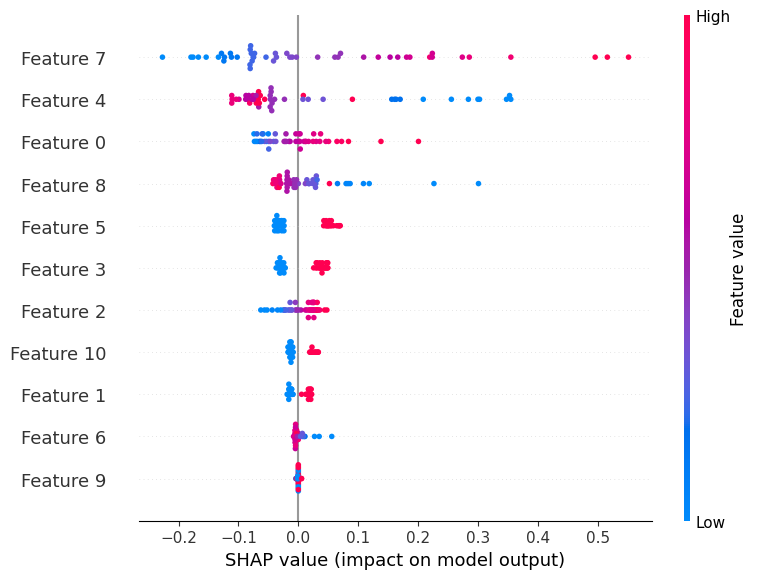

<Axes: title={'center': 'Feature Importance Based on SHAP Values'}>

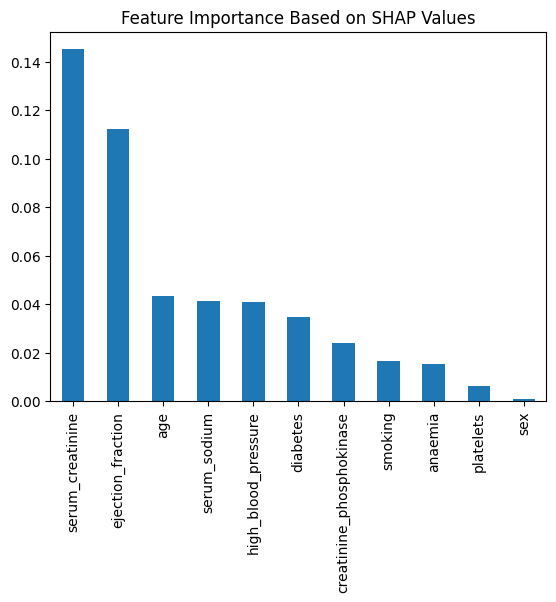

In [50]:
# Initialize the SHAP explainer
# We use the Kernel SHAP method to explain the output of any function.
# Kernel SHAP is a method that uses a special weighted linear regression to compute the importance 
# of each feature. This is done by sampling different combinations of feature values, calculating the 
# model’s prediction for each combination, and using these results to compute the average impact of each feature on the model’s prediction. 
explainer = shap.KernelExplainer(nb_model.predict_proba, X_train_scaled)

# Calculate SHAP values for the validation set
# SHAP values quantify how much each feature increases or decreases the predicted probability 
# relative to the baseline prediction (e.g., the mean prediction across all data points). 
# Positive SHAP values (red) indicate that the feature contributes to a higher prediction, 
# while negative values (blue) suggest a reduction.
shap_values = explainer.shap_values(X_val_scaled, nsamples=100)  # You can adjust nsamples for speed/accuracy

# Generate a summary plot of SHAP values for the positive class (e.g., death)
shap.summary_plot(shap_values[1], X_val_scaled)  # Assuming [1] corresponds to the positive class

# Create a DataFrame with SHAP values for analysis
shap_summary_df = pd.DataFrame(shap_values[1], columns=X_val.columns)

# Calculate the mean absolute SHAP value for each feature
mean_shap_values = shap_summary_df.abs().mean().sort_values(ascending=False)

# Plot the mean SHAP values
mean_shap_values.plot(kind='bar', title='Feature Importance Based on SHAP Values')

**Observations:**

The SHAP analysis was conducted to interpret the contributions of individual features in predicting patient mortality from heart failure. SHAP values provide insights into how much each feature impacts the model's predictions, allowing us to better understand the underlying factors associated with patient outcomes.

The analysis revealed that the serum_creatinine feature was the most significant predictor, with a mean SHAP value of 0.14, indicating a strong positive influence on the prediction of patient mortality. This means that higher levels of creatinine are associated with increased risk of death. This aligns with existing medical literature, which shows that renal dysfunction is a common complication in heart failure patients, often leading to worse outcomes.

The analysis reveals that ejection fraction also plays a crucial role in predicting mortality risk. Lower ejection fraction values are typically associated with worse heart function, which correlates with a higher likelihood of mortality. This finding underscores the importance of monitoring cardiac function in heart failure patients, as it can guide treatment decisions and patient management strategies.

In the following lines of code, we will re-train the model with the top-2 features obtained from our SHAP analysis 'serum_creatinine' and 'ejection_fraction'. We will compare the performance of our best performing model using those features and all features.

In [73]:
# Get only the serum_creatinine and ejection_fraction features from train, validation and test sets
X_train_scaled_new = X_train_scaled[:, [4, 7]]
X_val_scaled_new = X_val_scaled[:, [4, 7]]
X_test_scaled_new = X_test_scaled[:, [4, 7]]

# Initialize the new Naïve Bayes Classifier
nb_model_new = GaussianNB()

# Re-train model
nb_model_new.fit(X_train_scaled_new, y_train)

# Call the evaluation function
df_metrics_nb_new, metrics_val_nb_new = evaluate_model(nb_model_new, X_train_scaled_new, y_train, X_val_scaled_new, y_val, 'Naïve Bayes')

# Compare Naïve Bayes metrics with all the features and with the top-2 features
naïve_bayes_metrics = []
naïve_bayes_metrics.append(metrics_val_nb)
naïve_bayes_metrics.append(metrics_val_nb_new)

# List of model names corresponding to the metrics
model_names = [
    'Naïve Bayes - With All Features',
    'Naïve Bayes - With Top-2 Features'
    ]

# Create the DataFrame
nb_validation_metrics = pd.DataFrame(naïve_bayes_metrics)

# Add the Model names as a new column
nb_validation_metrics.insert(0, 'Model', model_names)

# Display the DataFrame
print(nb_validation_metrics)

                               Model  Accuracy  Precision    Recall  F1 Score  \
0    Naïve Bayes - With All Features  0.791667   0.647059  0.733333    0.6875   
1  Naïve Bayes - With Top-2 Features  0.750000   0.600000  0.600000    0.6000   

    ROC-AUC       MCC  
0  0.890909  0.534509  
1  0.864646  0.418182  


**Observations**:

The analysis of the Naïve Bayes model reveals that while the top two features (serum creatinine and ejection fraction) are important, they alone do not capture the complete picture necessary for accurate mortality predictions in heart failure patients. The model's performance metrics demonstrate that including additional features significantly enhances accuracy, precision, recall, F1 score, ROC-AUC, and MCC.

**Model Evaluation on Test Data**

In this final section, we will evaluate the best-performing model on the test dataset, which has remained untouched throughout the training process. This evaluation aims to assess the model's generalizability on unseen data, providing insights into its performance in real-world clinical scenarios. By doing so, we can better understand how well the model would perform when applied to actual clinical data in practice.

In [80]:
def test_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on the test set to assess the model's 
    generalizability on unseen data. 
    """
    # Make predictions on test data
    y_pred_test = model.predict(X_test)
    
    # Get classification metrics for testing
    metrics_test = {
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test, pos_label=1),
        "Recall": recall_score(y_test, y_pred_test, pos_label=1),
        "F1 Score": f1_score(y_test, y_pred_test, pos_label=1),
        "ROC-AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
        "MCC": matthews_corrcoef(y_test, y_pred_test)
    }
    
    # Convert metrics dictionaries to DataFrames
    df_metrics_test = pd.DataFrame(metrics_test, index=["Best Performing Model"]).round(2)
    
    # Calculate ROC Curve for testing
    fpr_test, tpr_test, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
   
    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC curve (area = {metrics_test["ROC-AUC"]:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Best Performing Model')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    # Calculate and plot confusion matrix for testing
    cm_test = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(confusion_matrix=cm_test).plot(cmap='Blues')
    plt.title(f"Confusion Matrix - Best Performing Model")
    plt.tight_layout()
    plt.show()
    
    return df_metrics_test

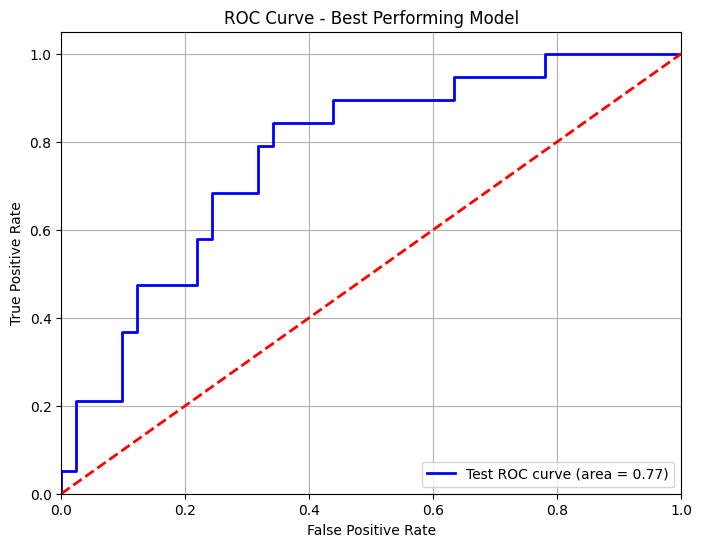

<Figure size 800x600 with 0 Axes>

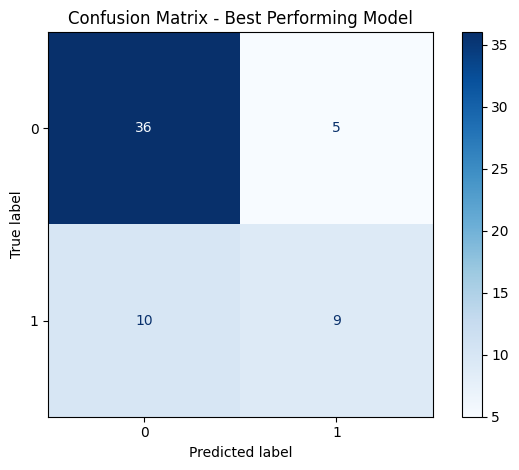

,Accuracy,Precision,Recall,F1 Score,ROC-AUC,MCC
Best Performing Model,0.75,0.64,0.47,0.55,0.77,0.39


In [81]:
# Call the test function
test_model(nb_model, X_test_scaled, y_test, 'Naïve Bayes')

**Conclusion:**

Although the best performing model shows a reasonable accuracy (75%) and ROC-AUC score (77%), it highlights significant areas for improvement, particularly in recall (47%), which is crucial given that the positive class represents patient mortality. The moderate precision (64%) and F1 score (55%) reinforce the necessity for model adjustments to better identify patients at risk of death.

Future efforts should focus on enhancing sensitivity and minimizing false negatives, as even small improvements in these metrics could greatly impact patient outcomes. This may involve techniques such as feature engineering, hyperparameter tuning, or exploring alternative modeling approaches that prioritize sensitivity in predicting mortality risk.